In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tkinter import filedialog
from tkinter import Tk

---
# **Importando uma base de dados**

In [77]:
# Seleciona um arquivo
root = Tk()
root.withdraw()
file_path = filedialog.askopenfilename(title="Escolha um arquivo CSV", filetypes=(("CSV files", "*.csv"), ("All files", "*.*"))) #Tipo de arquivo

if file_path:
    df = pd.read_csv(file_path, sep=';') #Sempre verificar o separador
    print(f"Arquivo '{file_path}' carregado com sucesso!")
else:
    print("Nenhum arquivo selecionado.")

Arquivo 'D:/GitHub/ml-playground/EDA/em_andamento/NIVEA_DATASET.csv' carregado com sucesso!


---
# **Visualizando os Dados**

In [78]:
df.head(10)

PRODUTO CATEGORIA
0                                NIVEA SUAVE SAB INT     Nivea
1                                DES NIVEA SENSITIVE     Nivea
2                                      CR NIVEA 145G     Nivea
3                                NIVEA SUAVE SAB INT     Nivea
4                        BRINDE NIVEA NECESSAIRE Q10     Nivea
5                      19373 - DROPS FREEGELLS MENTA     SNACK
6              19373 - LENCO UMED PAMPERS LAVANDA C/    FRALDA
7  A navalha de Ockham: O principio filosofico qu...     LIVRO
8                                    ABACATE GNEL kg    COMIDA
9                              ABOVE DES CARBON 150M    COMIDA

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PRODUTO    2150 non-null   object
 1   CATEGORIA  2150 non-null   object
dtypes: object(2)
memory usage: 33.7+ KB


In [80]:
df.tail(10)

PRODUTO CATEGORIA
2140  NFC CELLULAR LUMINOUS630 SERUM 30ML  Lote:2384...     Nivea
2141                    SERUM FACIAL NIVEA LUMINOUS 630     Nivea
2142  NIVEA Uniformizador Facial Cellular Luminous 6...     Nivea
2143                             NIVEA CEL LUM DIA 40ML     Nivea
2144  NIVEA CELLULAR LUMINOUS 630 ANTISPOT ANTIOLHEI...     Nivea
2145  NIVEA Uniformizador Facial Cellular Luminous 6...     Nivea
2146  NIVEA PREENCHEDOR Q10 EXPERT ANTISSINAIS  Lote...     Nivea
2147  NIVEA CELLULAR LUMINOUS 630 ANTISPOT ANTIOLHEI...     Nivea
2148                    SERUM FACIAL NIVEA LUMINOUS 630     Nivea
2149      NIVEA PREENCHEDOR Q10 EXPERT ANTISSINAIS 15ML     Nivea

In [81]:
linhas, colunas = df.shape
print(f"Linhas: {linhas:,}\nColunas:{colunas:,}")

Linhas: 2,150
Colunas:2


---
# **Data Preparation**

- Alterar nomes de colunas
- Verificar se os tipos de cada vari√°vel est√£o corretos

Os nomes das features est√£o corretos e o tipo de cada um est√° de acordo

In [84]:
df = df.rename(columns=lambda x: x.strip().lower())
print(df)

                                                produto categoria
0                                   NIVEA SUAVE SAB INT     Nivea
1                                   DES NIVEA SENSITIVE     Nivea
2                                         CR NIVEA 145G     Nivea
3                                   NIVEA SUAVE SAB INT     Nivea
4                           BRINDE NIVEA NECESSAIRE Q10     Nivea
...                                                 ...       ...
2145  NIVEA Uniformizador Facial Cellular Luminous 6...     Nivea
2146  NIVEA PREENCHEDOR Q10 EXPERT ANTISSINAIS  Lote...     Nivea
2147  NIVEA CELLULAR LUMINOUS 630 ANTISPOT ANTIOLHEI...     Nivea
2148                    SERUM FACIAL NIVEA LUMINOUS 630     Nivea
2149      NIVEA PREENCHEDOR Q10 EXPERT ANTISSINAIS 15ML     Nivea

[2150 rows x 2 columns]


---
# **EDA**

**1. Verificando os tipos de dados**

In [85]:
contagem_tipos = df.dtypes.value_counts().to_dict()
resumo = ", ".join([f"{contagem} colunas do tipo {tipo}" for tipo, contagem in contagem_tipos.items()])
print(resumo)

2 colunas do tipo object


In [86]:
print("Mais detalhes sobre as colunas:\n")

informacoes_colunas = pd.DataFrame({
    'Tipo de Dado': df.dtypes,
    'Contagem nao nulos': df.count(),
    'Contagem nulos': df.isnull().sum(),
    'Porcentagem nulos': (df.isnull().sum() / len(df) * 100).round(2),
    'Valores unicos': df.nunique(),
    'Porcentagem cardinalidade' : (df.nunique() / len(df) *100).round(2)
})

print(informacoes_colunas)


Mais detalhes sobre as colunas:

          Tipo de Dado  Contagem nao nulos  Contagem nulos  Porcentagem nulos  \
produto         object                2150               0                0.0   
categoria       object                2150               0                0.0   

           Valores unicos  Porcentagem cardinalidade  
produto               870                      40.47  
categoria              12                       0.56  


In [87]:
porcentagem_nulos_alta = informacoes_colunas[informacoes_colunas['Porcentagem nulos'] > 25].index.tolist() # Porcentagem de valores Nulos
if porcentagem_nulos_alta:
    print(f"Colunas com altas taxas de valores nulos: {', '.join(porcentagem_nulos_alta)}")

else:
    print("N√£o foi identificado altas taxas de valores nulos!")

N√£o foi identificado altas taxas de valores nulos!


In [88]:
valor_unico = informacoes_colunas[informacoes_colunas['Valores unicos'] == 1].index.tolist()
if valor_unico:
    print(f"Colunas com um √∫nico valor: {', '.join(valor_unico)}")
else:
    print("N√£o foi identificado valores √∫nicos!")

N√£o foi identificado valores √∫nicos!


In [89]:
porcentagem_cardinalidade_alta = informacoes_colunas[informacoes_colunas['Porcentagem cardinalidade'] > 90].index.tolist()
if porcentagem_cardinalidade_alta:
    print(f"Colunas com altas taxas de cardinalidade: {', '.join(porcentagem_cardinalidade_alta)}")
else:
    print("N√£o foi identificado altas taxas de cardinalidade!")

N√£o foi identificado altas taxas de cardinalidade!


---
**2. Analizando os valores nulos**

In [90]:
total_celulas = np.prod(df.shape)
total_nulos = df.isnull().sum().sum()
porcentagem_nulos = (total_nulos/total_celulas) * 100

print(f"Vis√£o geral: {total_nulos} valores nulos de {total_celulas} c√©lulas, sendo {porcentagem_nulos:.2f}% do total.")

Vis√£o geral: 0 valores nulos de 4300 c√©lulas, sendo 0.00% do total.


In [91]:
if total_nulos > 0:
    #plotar um gr√°fico de nulos
    plt.figure(figsize=(12,6))
    ax = sns.heatmap(df.isnull(), cbar = False, cmap = "viridis", yticklabels = False)
    plt.title("Mapa de Valores nulos")
    plt.tight_layout()
    plt.show()

    colunas_nulos = df.columns[df.isnull().any()].tolist()
    print(f"Colunas com dados nulos: {', '.join(colunas_nulos)}")

    dados_nulos = pd.DataFrame({
        'Contagem de nulos': df.isnull().sum(),
        'Porcentagem de nulos': (df.isnull().sum() / len(df) * 100).round(2)
    }).sort_values('Porcentagem de nulos', ascending=False)

    dados_nulos = dados_nulos[dados_nulos['Contagem de nulos'] > 0]

    plt.figure(figsize = (12,6))
    ax = dados_nulos['Porcentagem de nulos'].plot(kind='bar')
    plt.title('Porcentagem de valores nulos por Coluna')
    plt.xlabel('Colunas')
    plt.ylabel('Porcentagem de nulos')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    display(dados_nulos)

else:
    print(f"N√£o foram encontrados valores nulos!")

N√£o foram encontrados valores nulos!


---
**3. Verificando se existe registros duplicados**

In [92]:
contagem_duplicados =  df.duplicated().sum()

if contagem_duplicados > 0:
    porcentagem_duplicados = (contagem_duplicados / len(df)) * 100
    print(f"Foi encontrado {contagem_duplicados} registros duplicados, o que corresponde a {porcentagem_duplicados:.2f} do total de registros")
else: 
    print("N√£o foi encontrado registros duplicados no dataset.")

Foi encontrado 1270 registros duplicados, o que corresponde a 59.07 do total de registros


Isso √© um belo de um problemas, pois pode causar overfitting quando for treinar o modelo

In [93]:
# Encontrar duplicatas com base em todas as colunas
duplicados = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

print("üå∏ Registros Duplicados üå∏")
print(duplicados.to_string(index=False))

üå∏ Registros Duplicados üå∏
                                                                                                                 produto categoria
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                    

In [94]:
df_com_duplicados = df
df = df.drop_duplicates()

In [95]:
duplicados = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

print("üå∏ Registros Duplicados üå∏")
print(duplicados.to_string(index=False))

üå∏ Registros Duplicados üå∏
Empty DataFrame
Columns: [produto, categoria]
Index: []


---
**4. Inferindo tipos de dados**

In [96]:
def inferir_tipos_colunas(df):
    col_numericas = []
    col_categorias = []
    col_datetime = []
    col_text = []
    col_id = []

    for col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            col_datetime.append(col)
        elif pd.api.types.is_numeric_dtype(df[col]):
            if("id" in col.lower() or col.lower().endswith("_id") and df[col].nunique() > 0.8 *len(df)):
                col_id.append(col)
            else: 
                col_numericas.append(col)
        elif pd.api.types.is_object_dtype(df[col]):
            amostra = df[col].dropna().sample(min(10, len(df[col].dropna()))).astype(str)
            avg_len = amostra.str.len().mean()
            max_len = amostra.str.len().max()
            unique_ratio = df[col].nunique() / len(df[col].dropna())
            if ('id' in col.lower() or col.lower().endswith('_id')) and unique_ratio > 0.8:
                    col_id.append(col)
            elif avg_len > 50 or (max_len > 100 and unique_ratio > 0.9):
                col_text.append(col)
            else:
                col_categorias.append(col)

    return {
        'numerica': col_numericas,
        'categorica': col_categorias,
        'datetime': col_datetime,
        'textual': col_text,
        'id': col_id
    }

tipos_colunas = inferir_tipos_colunas(df)
for tipo, cols in tipos_colunas.items():
    if cols:
        print(f"Coluna {tipo.capitalize()} ({len(cols)}): {', '.join(cols)}")

Coluna Categorica (1): categoria
Coluna Textual (1): produto


---
**5. Verificando inconsist√™ncias ou poss√≠veis problemas**

In [97]:
def verificar_consistencia_dados(df):
    problemas = []

    for col in tipos_colunas['numerica']:
        if df[col].dtype in [np.int64, np.int32, np.float64, np.float32]:
            if df[col].isnull().sum() > 0.5 * len(df):
                continue
            # verifica outliers usando o m√©todo IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
            porcentagem_outliers = len(outliers) / len(df) * 100
        
            if porcentagem_outliers > 5:
                problemas.append(f"Coluna '{col}' tem {porcentagem_outliers:.2f}% de poss√≠veis outliers\nLimite: {limite_inferior:.2f} a {limite_superior:.2f}" )

            indicadores_quantidade = ['qtd', 'quantidade', 'preco', 'ano', 'peso', 'altura'] #alguns indicadores
            if any(indicador in col.lower() for indicador in indicadores_quantidade):
                valores_negativos = (df[col] < 0).sum()
                if valores_negativos > 0:
                    problemas.append(f"Coluna '{col}' cont√©m {valores_negativos} valores negativos")
    
    for col in tipos_colunas['categorica']:
        if df[col].isnull().sum() > 0.5 * len(df):
            continue
            
        if df[col].nunique() > 1:
            qtd_valores = df[col].value_counts()
            valores_raros = qtd_valores[qtd_valores < len(df) * 0.01]
            if len(valores_raros) > 0 and len(valores_raros) < 0.5 * df[col].nunique():
                problemas.append(f"A coluna '{col}' tem {len(valores_raros)} categoria(s) raras (cada uma com menos de 1% dos dados), que talvez precisem ser agrupadas.")

        if df[col].dtype == object:
            valores = df[col].dropna().astype(str)
            valores_baixos = valores.str.lower()
            casos_duplicados = valores_baixos.value_counts()[valores_baixos.value_counts() > 1].index
            if len(casos_duplicados) > 0:
                problemas_amostra = []
                for valor in casos_duplicados[:3]:
                    variacoes = valores[valores_baixos == valor].unique()
                    if len(variacoes) > 1:
                        problemas_amostra.append(f"'{variacoes[0]}' x '{variacoes[1]}'")
                if problemas_amostra:
                    problemas.append(f"A coluna '{col}' possui inconsist√™ncias, como: {', '.join(problemas_amostra)}")

    for col in tipos_colunas['datetime']:
        if pd.Timestamp.now() < df[col].max():
            futuro = (df[col] > pd.Timestamp.now()).sum()
            if futuro > 0:
                problemas.append(f"A coluna '{col}' cont√©m {futuro} datas no futuro, isso pode indicar erros nas datas.")

    return problemas

problemas = verificar_consistencia_dados(df)

if problemas:
    print("Existem potenciais PROBLEMAS!\n")
    for i, problema in enumerate(problemas, 1):
        print(f"{i}. {problema}\n")
else: 
    print("N√£o foram identificados poss√≠veis problemas")

N√£o foram identificados poss√≠veis problemas


---
**6. Variaveis Num√©ricas**

In [98]:
if tipos_colunas['numerica']:
    estatisticas = df[tipos_colunas['numerica']].describe().T
    estatisticas['range'] = estatisticas['max'] - estatisticas['min']
    estatisticas['coeficiente_variacao'] = (estatisticas['std']/estatisticas['mean'] *100).round(2)
    estatisticas = estatisticas.sort_values('coeficiente_variacao', ascending = False)

    print("Resumo estat√≠stico das colunas Num√©ricas")
    display(estatisticas)

    #Identificando vari√°veis com altas varia√ß√µes
    if len(estatisticas) > 0:
        colunas_alta_variacao = estatisticas.nlargest(min(3, len(estatisticas)), 'coeficiente_variacao').index.tolist()
        print(f"Colunas Numericas com varia√ß√µes altas:  {', '.join(colunas_alta_variacao)}")

else:
    print("N√£o foi identificado variaveis num√©ricas no dataset!")

N√£o foi identificado variaveis num√©ricas no dataset!


- Plotando essas Varia√ß√µes

In [99]:
colunas_numericas = min(len(tipos_colunas['numerica']), 16)

if colunas_numericas > 0:
    colunas_plot = tipos_colunas['numerica'][:colunas_numericas]
    n_colunas = min(3, colunas_numericas)
    n_linhas = (colunas_numericas + n_colunas -1)//n_colunas

    fig, axes = plt.subplots(n_linhas, n_colunas, figsize = (15, 3*n_linhas))
    if n_linhas == 1 and n_colunas == 1:
        axes = np.array([axes]) 
        axes = axes.flatten()

    for i, col in enumerate(colunas_plot):
        if df[col].isnull().sum() > 0.5 * len(df):
            continue
        ax = axes[i]
        sns.histplot(df[col].dropna(), kde=True, ax=ax)
        ax.set_title(f"Distribuicao de {col}")
        ax.set_xlabel(col)
        ax.tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
            axes[j].set_visible(False)   

    plt.tight_layout()
    plt.show() 

    #identificar outliers

    fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(15, 3*n_linhas))
    if n_linhas == 1 and n_colunas == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, col in enumerate(colunas_plot):
        if df[col].isnull().sum() > 0.5 * len(df):
            continue
        ax = axes[i]
        sns.boxplot(x=df[col].dropna(), ax=ax)
        ax.set_title(f'Boxplot de {col}')
        ax.set_xlabel(col)

    for j in range(i+1, len(axes)):
            axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()       

else: 
     print("N√£o foi identificado variaveis num√©ricas no dataset!")

N√£o foi identificado variaveis num√©ricas no dataset!


---
**7. Vari√°veis Categ√≥ricas**

Top valores da coluna 'categoria' (entre 12 valores diferentes)


Frequ√™ncia  Porcentagem
categoria                           
Nivea               560        63.64
OUTROS              290        32.95
COMIDA                8         0.91
WELLA                 7         0.80
NATURA                4         0.45
J&J                   4         0.45
USO_PESSOAL           2         0.23
SNACK                 1         0.11
LIVRO                 1         0.11
FRALDA                1         0.11

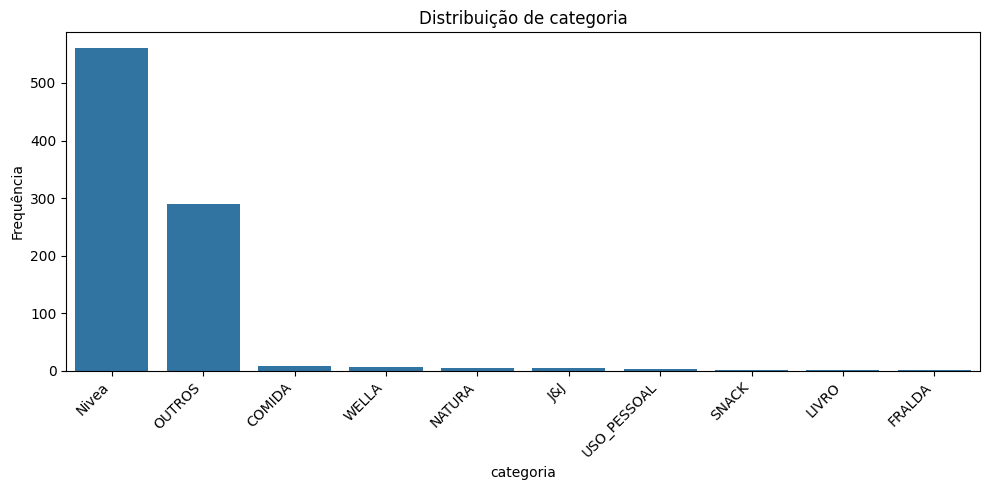

In [100]:
if tipos_colunas['categorica']:
    for col in tipos_colunas['categorica'][:min(10, len(tipos_colunas['categorica']))]:
        if df[col].nunique() > 50 or df[col].isnull().sum() > 0.5 * len(df):  # categorias demais ou mais de 50% nulos
            print(f"A coluna '{col}' possui muitas categorias ou valores nulos para uma an√°lise.\n")
            continue

        c_vezes = df[col].value_counts().head(10)
        c_porcentagem = (c_vezes / len(df) * 100).round(2)
        print(f"Top valores da coluna '{col}' (entre {df[col].nunique()} valores diferentes)")

        c_resumo = pd.DataFrame({
            'Frequ√™ncia': c_vezes,
            'Porcentagem': c_porcentagem
        })
        display(c_resumo)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=c_vezes.index, y=c_vezes.values)
        plt.title(f'Distribui√ß√£o de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequ√™ncia')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

else:
    print("N√£o foram identificadas vari√°veis categ√≥ricas no dataset.")


√â poss√≠vel observar uma alta concentra√ß√£o em certos pontos dessa distribui√ß√£o, como por exemplo, a categoria 'Nivea' ocupa 63.64%, significando mais da metade da categoriza√ß√£o. Isso se torna ruim para o modelo, pois quando for treinado com esse desequil√≠brio, a classifica√ß√£o ir√° tender sempre para aquele com mais registros, que no caso seria NIVEA.

Outro ponto √©, com categorias com valores t√£o insignificantes baseados no tamanho do dataset, ser√° que n√£o seria vi√°vel remover essas categorias da base e deix√°-los apenas como outros? E caso sejam novos e n√£o tenham sa√≠do tanto, ser√° que n√£o seria vi√°vel deixar essa classifica√ß√£o de 'OUTROS' em um segundo dataset para que eventualmente voltem para essa base de dados para um classifica√ß√£o mais precisa?

Verificando a diferen√ßa entre frequencias e quanto isso representa dentro do conjunto de registros categorizados como NIVEA

In [114]:
# Soma de todas as categorias exeto nivea
soma_exeto_nivea = 0
for linha in df['categoria']:
    if linha != 'Nivea':
        soma_exeto_nivea += 1
nivea = 560
diferenca = nivea - soma_exeto_nivea
print(diferenca)

240


In [113]:
#diferenca que isso representa
print(f"{((diferenca/nivea)*100):.2f}%")

42.86%


Ent√£o, para treino, mesmo se juntar todas as categorias restantes (todas exeto NIVEA), elas ainda n√£o estar√£o igualadas. Com isso talvez ser√° necess√°rio utilizar a t√©cnica de undersampling, reduzindo 42. 86% ou exatos 240 registros com a categoria NIVEA

### **Aplicando a t√©cnica de Undersampling**

In [115]:
from sklearn.utils import resample

In [117]:
df_sem_undersampling = df
categoria_majoritaria = 'Nivea'
df_majoritario = df[df['categoria'] == categoria_majoritaria]
df_minoria = df[df['categoria'] != categoria_majoritaria]

df_maj_down = resample(df_majoritario, replace=False, n_samples=len(df_minoria), random_state=42)
df = pd.concat([df_maj_down, df_minoria]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_sem_undersampling['categoria'].value_counts(), '\n‚Üí antes')
print(df['categoria'].value_counts(), '\n‚Üí depois')

categoria
Nivea          560
OUTROS         290
COMIDA           8
WELLA            7
NATURA           4
J&J              4
USO_PESSOAL      2
SNACK            1
LIVRO            1
FRALDA           1
LIMPEZA          1
YOPRO            1
Name: count, dtype: int64 
‚Üí antes
categoria
Nivea          320
OUTROS         290
COMIDA           8
WELLA            7
J&J              4
NATURA           4
USO_PESSOAL      2
SNACK            1
YOPRO            1
FRALDA           1
LIMPEZA          1
LIVRO            1
Name: count, dtype: int64 
‚Üí depois


### **Alterando o nome de todas as categorias que n√£o for Nivea por 'OUTROS'**

In [120]:
df['categoria'] = df['categoria'].apply(lambda x: x if x in ['OUTROS', 'Nivea'] else 'OUTROS')

Top valores da coluna 'categoria' (entre 2 valores diferentes)


Frequ√™ncia  Porcentagem
categoria                         
OUTROS            320         50.0
Nivea             320         50.0

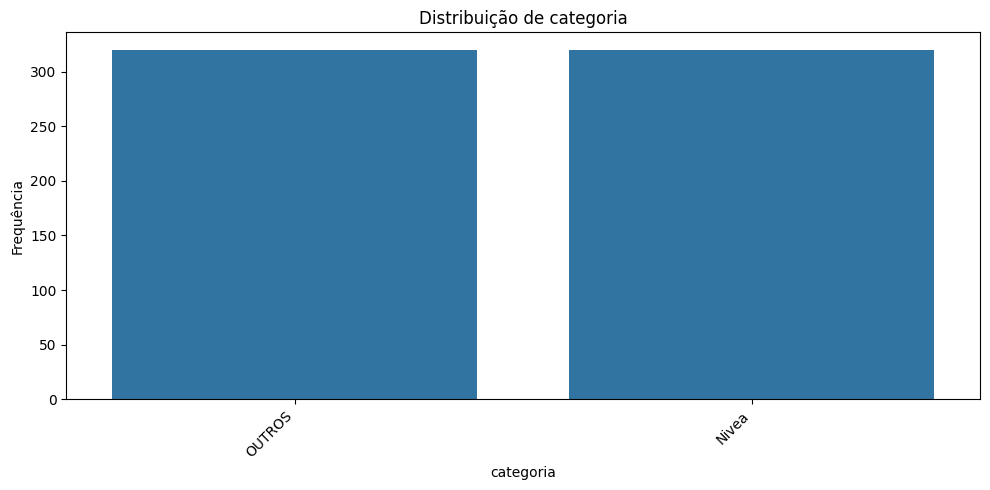

In [121]:
if tipos_colunas['categorica']:
    for col in tipos_colunas['categorica'][:min(10, len(tipos_colunas['categorica']))]:
        if df[col].nunique() > 50 or df[col].isnull().sum() > 0.5 * len(df):  # categorias demais ou mais de 50% nulos
            print(f"A coluna '{col}' possui muitas categorias ou valores nulos para uma an√°lise.\n")
            continue

        c_vezes = df[col].value_counts().head(10)
        c_porcentagem = (c_vezes / len(df) * 100).round(2)
        print(f"Top valores da coluna '{col}' (entre {df[col].nunique()} valores diferentes)")

        c_resumo = pd.DataFrame({
            'Frequ√™ncia': c_vezes,
            'Porcentagem': c_porcentagem
        })
        display(c_resumo)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=c_vezes.index, y=c_vezes.values)
        plt.title(f'Distribui√ß√£o de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequ√™ncia')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

else:
    print("N√£o foram identificadas vari√°veis categ√≥ricas no dataset.")


Agora sim est√° balanceado, e caso eu queira todos eles sepados como estava, eles est√£o salvos em ``df_sem_undersampling``

In [124]:
df_sem_undersampling['categoria'].unique()

array(['Nivea', 'SNACK', 'FRALDA', 'LIVRO', 'COMIDA', 'USO_PESSOAL',
       'LIMPEZA', 'OUTROS', 'J&J', 'WELLA', 'NATURA', 'YOPRO'],
      dtype=object)

---
**8. Datetime**

In [125]:
if tipos_colunas['datetime']:
    for col in tipos_colunas['datetime']:
        if df[col].isnull().sum()>0.5 *len(df):
            print(f"A coluna {col} possui muitos valores nulos para uma an√°lise.")
            continue

        min_data = df[col].min()
        max_data = df[col].max()
        periodo = (max_data-min_data).days

        print(f"'{col}' vai de {min_data} at√© {max_data} ({periodo} dias)")

        plt.figure(figsize=(15,10))

        #Subplot da distribuicao por data
        plt.subplot(2,2,1)
        df[col].dt.date.value_count().sort_index().plot()
        plt.title(f"Distribui√ß√£o ao longo do tempo")
        plt.xlabel("Data")
        plt.ylabel('Frequ√™ncia')

        #Subplot da distribuicao por mes
        plt.subplot(2,2,2)
        freq_mes = df[col].dt.month.value_counts().sort_index()
        meses = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
        freq_mes.index = freq_mes.index.map(meses)
        freq_mes.plot(kind='bar')
        plt.title("Distribui√ß√£o por M√™s")
        plt.xlabel("M√™s")
        plt.ylabel("Frequ√™ncia")

        #Subplot de Distribui√ß√£o por dias da Semana
        plt.subplot(2,2,3)
        freq_dias_semana = df[col].dt.dayofweek.value_counts().sort_index()
        dias = {0: 'Seg', 1: 'Ter', 2: 'Qua', 3: 'Qui', 4: 'Sex', 5: 'S√°b', 6: 'Dom'}
        freq_dias_semana.index = freq_dias_semana.index.map(dias)
        freq_dias_semana.plot(kind='bar')
        plt.title("Distribui√ß√£o por Dia da Semana")
        plt.xlabel("Dia da Semana")
        plt.ylabel('Frequ√™ncia')

        #Subplot de distribui√ß√£o por hora caso tenha hor√°rio
        plt.subplot(2, 2, 4)
        if (df[col].dt.hour != 0).any():
            df[col].dt.hour.value_counts().sort_index().plot(kind='bar')
            plt.title('Distribui√ß√£o por Hora do Dia')
            plt.xlabel('Hora')
            plt.ylabel('Frequ√™ncia')
        else:
            plt.text(0.5,0.5, "N√£o foi encontrado o hor√°rio na coluna!", horizontalalignment='center', verticalalignment='center')
            plt.axis('off')

        plt.tight_layout()
        plt.show()
    
else:
    print("N√£o foram encontradas vari√°veis Datetime no dataset")



N√£o foram encontradas vari√°veis Datetime no dataset


---
**9. Rela√ß√µes entre vari√°veis num√©ricas**

In [126]:
if len(tipos_colunas['numerica']) > 1:
    correlacao = df[tipos_colunas['numerica']].corr()

    #Heatmap
    plt.figure(figsize=(12,10))
    mask = np.triu(np.ones_like(correlacao, dtype=bool), k=1)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)  
    sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True, fmt=".2f", square=True, linewidths=.5)  
    plt.title('Correla√ß√£o entre Vari√°veis Num√©ricas')  
    plt.tight_layout() 
    plt.show()

    correlacoes_fortes = []
    for i in range(len(correlacao.columns)):
        for j in range(i + 1, len(correlacao.columns)):
            valor_corr = correlacao.iloc[i, j]
            if abs(valor_corr) > 0.7:  # Limite para correla√ß√£o forte
                coluna1 = correlacao.columns[i]
                coluna2 = correlacao.columns[j]
                correlacoes_fortes.append((coluna1, coluna2, valor_corr))

    for col1, col2, corr in correlacoes_fortes:
        print(f"As colunas '{col1}' e '{coluna2}' tem correla√ß√£o de {corr:.2f}")

    if correlacoes_fortes:
        print("Pares fortemente correlacionados de vari√°veis num√©ricas (correla√ß√£o > 0.7):\n")
        for coluna1, coluna2, valor_corr in sorted(correlacoes_fortes, key=lambda x: abs(x[2]), reverse=True):
            print(f"{coluna1} e {coluna2}: {valor_corr:.3f}")
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[coluna1], y=df[coluna2], alpha=0.6)
            plt.title(f'Gr√°fico de Dispers√£o: {coluna1} x {coluna2} (Correla√ß√£o: {valor_corr:.3f})')
            plt.xlabel(coluna1)
            plt.ylabel(coluna2)
            plt.tight_layout()
            plt.show()
    else:
        print("Nenhuma correla√ß√£o forte (correla√ß√£o > 0.7) encontrada entre vari√°veis num√©ricas.")

else:
    print("N√£o foram encontradas vari√°veis num√©ricas suficiente para an√°lise, precisa de pelo menos 2 vari√°veis num√©ricas")

N√£o foram encontradas vari√°veis num√©ricas suficiente para an√°lise, precisa de pelo menos 2 vari√°veis num√©ricas


---
**10. Rela√ß√µes entre vari√°veis categoricas e num√©ricas**

In [127]:
from scipy import stats #para o teste ANOVA

In [128]:
if tipos_colunas['categorica'] and tipos_colunas['numerica']:
    cat_cols = tipos_colunas['categorica']
    num_cols = tipos_colunas['numerica']

    for cat_col in cat_cols:
        if df[cat_col].nunique() > 10 or df[cat_col].isnull().sum() > 0.5 * len(df):
            print(f"Pulando '{cat_col}'")
            continue
        for num_col in num_cols:
            if df[num_col].isnull().sum() > 0.5 * len(df):
                print(f"Pulando '{num_col}'")
                continue

            print(f"\nAnalisando '{cat_col}' √ó '{num_col}':\n")
            #Box plot para visualizar a distribuicao por categoria
            plt.figure(figsize=(12,6))

            plt.subplot(1,2,1)
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.title(f"Distribui√ß√£o de '{num_col}' por '{cat_col}'")
            plt.xlabel(cat_col)
            plt.ylabel(num_col)
            plt.xticks(rotation=45, ha='right')

            plt.subplot(1, 2, 2)
            medias = df.groupby(cat_col)[num_col].mean().sort_values(ascending=False)
            sns.barplot(x=medias.index, y=medias.values)
            plt.title(f"M√©dia de '{num_col}' por '{cat_col}'")
            plt.xlabel(cat_col)
            plt.ylabel(f"M√©dia de {num_col}")
            plt.xticks(rotation=45, ha='right')

            plt.tight_layout()
            plt.show()

            #teste ANOVA
            try:
                # Obt√©m categorias v√°lidas na coluna categ√≥rica, removendo valores ausentes
                categorias = df[cat_col].dropna().unique()
                if len(categorias) > 1:  # Precisa de pelo menos 2 categorias para ANOVA
                    # Agrupa os valores num√©ricos por categoria e remove grupos vazios
                    grupos = [df[df[cat_col] == cat][num_col].dropna() for cat in categorias]
                    grupos = [grupo for grupo in grupos if len(grupo) > 0]
                    
                    if len(grupos) > 1:  # Precisa de pelo menos 2 grupos n√£o vazios
                        estatistica_f, p_valor = stats.f_oneway(*grupos)
                        if p_valor < 0.05:
                            print(f"‚úÖ Rela√ß√£o significativa: a m√©dia de '{num_col}' varia significativamente entre as categorias de '{cat_col}' (p-valor: {p_valor:.5f}).")
                        else:
                            print(f"‚ùå Nenhuma rela√ß√£o significativa: a m√©dia de '{num_col}' n√£o varia significativamente entre as categorias de '{cat_col}' (p-valor: {p_valor:.5f}).")
            except Exception as e:
                print(f"N√£o foi poss√≠vel realizar o teste estat√≠stico: {str(e)}")

else:
    print("√â necess√°rio ter vari√°veis categ√≥ricas e num√©ricas para esta an√°lise")

√â necess√°rio ter vari√°veis categ√≥ricas e num√©ricas para esta an√°lise


---
**11. Vizualizando pares de features**

In [129]:
if len(tipos_colunas['numerica']) >1:
    colunas_num = tipos_colunas['numerica'][::min(4, len(tipos_colunas['numerica']))]
    if tipos_colunas['categorica']:
        for cat_col in tipos_colunas['categorica']:
            if 2 <= df[cat_col].nunique() <= 5:
                hue_col = cat_col
                break
        else:
            hue_col = None
    else:
        hue_col = None

    print("Pair Plot de Features Num√©ricas Selecionadas:")
    tamanho_amostra = min(5000, len(df))
    sample_df = df.sample(tamanho_amostra) if len(df) > tamanho_amostra else df

    plt.figure(figsize=(12, 10))
    plot_df = sample_df[colunas_num].copy()

    if hue_col:
        plot_df[hue_col] = sample_df[hue_col]
        g = sns.pairplot(plot_df, hue=hue_col, corner=True, diag_kind="kde", plot_kws={"alpha": 0.6}, palette="pastel")
        g.fig.set_size_inches(6, 5)
        g.fig.suptitle(f'Pair Plot colorido por {hue_col}', y=1.02)
    else:
        g = sns.pairplot(plot_df,corner=True,diag_kind="kde",plot_kws={"alpha": 0.6}, palette="pastel")
        g.fig.set_size_inches(6, 5)
        g.fig.suptitle('Pair Plot de Features Num√©ricas Selecionadas', y=1.02)
    
    plt.tight_layout()
    plt.show()

    print("Insights do Pair Plot:\n- A diagonal mostra a distribui√ß√£o de cada vari√°vel\n- Os gr√°ficos fora da diagonal mostram as rela√ß√µes entre pares de vari√°veis\n- Observe padr√µes, clusters ou tend√™ncias nos scatter plots")

else:
    print("Vari√°veis num√©ricas insuficientes para an√°lise de pair plot (√© preciso pelo menos 2).")

Vari√°veis num√©ricas insuficientes para an√°lise de pair plot (√© preciso pelo menos 2).


---
**12. Pandas Profiling Report**

In [130]:
from ydata_profiling import ProfileReport

In [133]:
profile = ProfileReport(df, title='Relat√≥rio Pandas Profiling com Undersumpling', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 111.01it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [132]:
profile = ProfileReport(df_sem_undersampling, title='Relat√≥rio Pandas Profiling sem Undersampling', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 49.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("\n\nArquivo HTML")
profile.to_file("relatorio.html")

---
# **Testando um modelo simples**

√â bom que transformamos em apenas duas categorias, pois o modelo fica simples

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [142]:
X = df[['produto']]              # input: produto
y = df['categoria']              # output: categoria

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X['produto'], y, test_size=0.3, random_state=42)

model = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', MultinomialNB())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Nivea       0.71      0.99      0.82        95
      OUTROS       0.98      0.60      0.74        97

    accuracy                           0.79       192
   macro avg       0.84      0.79      0.78       192
weighted avg       0.85      0.79      0.78       192

